In [1]:
#경사 하강법

최저점의 위치 :  [0.44455055 0.19485836]


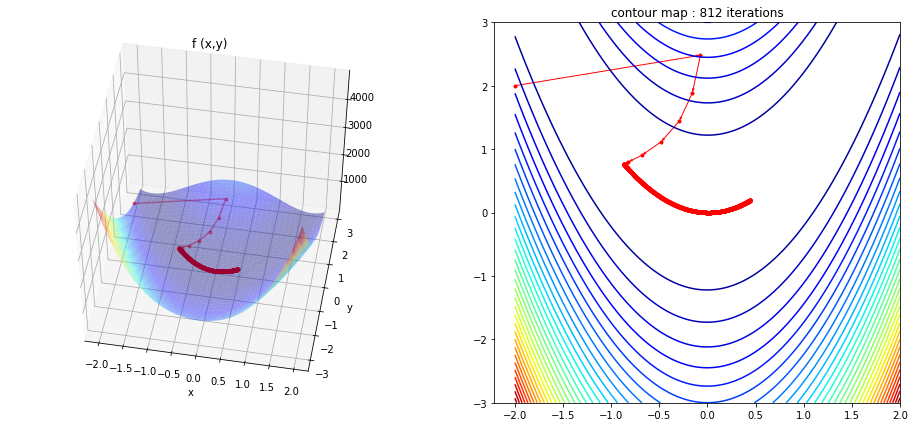

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def f(x,y): #함수 정의
    return (1 + x) ** 2 + 100 * (y - x ** 2) ** 2

def gradient(x,y): #해당 위치에서 미분값을 리턴
    dx = -400*x*y + 400*x**3 + 2 * x - 2
    dy = 200 * y - 200 * x ** 2
    return np.array([dx, dy])

#eta = 학습률, epsilon = 최소 허용 변동값, nMax = epoche
def GradientDescent(Grad, x, y, eta = 0.0012, epsilon = 0.001, nMax = 1000):
    i = 0
    pos_x, pos_y, pos_count = np.empty(0), np.empty(0), np.empty(0)
    error = 1
    sol = np.array([x,y]) #위치값
    
    while np.linalg.norm(error) > epsilon and i < nMax :
        i += 1
        pos_x = np.append(pos_x, x) #pos_x array에 x값 추가
        pos_y = np.append(pos_y, y) #pos_y array에 y값 추가
        pos_count = np.append(pos_count, i)
        sol_prev = sol
        sol = sol - eta * Grad(x,y) # 위치값 update
        error = sol - sol_prev # 변동값 check
        x, y = sol[0], sol[1]
        
    print('최저점의 위치 : ', sol)
    return sol, pos_x, pos_y, pos_count


solution, pos_x, pos_y, pos_count = GradientDescent(gradient, -2, 2)

x = np.linspace(-2, 2, 200)
y = np.linspace(-3, 3, 300)

X, Y = np.meshgrid(x, y)
Z = f(X,Y)
anglesx = pos_x[1:] - pos_x[:-1] #벡터의 방향 값 (x_n+ 1 - x _n) --> 방향
anglesy = pos_y[1:] - pos_y[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1,2,1, projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4)
ax.plot(pos_x, pos_y, f(pos_x, pos_y), color = 'r', marker = '.', alpha = .4)
ax.view_init(50, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('f (x,y)')

ax = fig.add_subplot(1, 2, 2)
ax.contour(X, Y, Z, 40, cmap = 'jet')
ax.scatter(pos_x, pos_y, color = 'r', marker = '.')
ax.quiver(pos_x[:-1], pos_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r')
ax.set_title('contour map : {} iterations'.format(len(pos_count)))

plt.show()

In [9]:
print(pos_x[1:])

[-7.28000000e-02 -1.56701202e-01 -2.93942034e-01 -4.81721029e-01
 -6.82234727e-01 -8.21418517e-01 -8.65584715e-01 -8.69022473e-01
 -8.68088815e-01 -8.66977823e-01 -8.65859024e-01 -8.64738492e-01
 -8.63616448e-01 -8.62492897e-01 -8.61367833e-01 -8.60241253e-01
 -8.59113150e-01 -8.57983520e-01 -8.56852357e-01 -8.55719657e-01
 -8.54585413e-01 -8.53449622e-01 -8.52312277e-01 -8.51173374e-01
 -8.50032906e-01 -8.48890870e-01 -8.47747258e-01 -8.46602067e-01
 -8.45455290e-01 -8.44306923e-01 -8.43156959e-01 -8.42005393e-01
 -8.40852220e-01 -8.39697434e-01 -8.38541030e-01 -8.37383002e-01
 -8.36223343e-01 -8.35062050e-01 -8.33899115e-01 -8.32734534e-01
 -8.31568300e-01 -8.30400408e-01 -8.29230852e-01 -8.28059626e-01
 -8.26886724e-01 -8.25712140e-01 -8.24535868e-01 -8.23357903e-01
 -8.22178239e-01 -8.20996869e-01 -8.19813787e-01 -8.18628987e-01
 -8.17442463e-01 -8.16254210e-01 -8.15064220e-01 -8.13872488e-01
 -8.12679007e-01 -8.11483771e-01 -8.10286774e-01 -8.09088010e-01
 -8.07887471e-01 -8.06685

In [12]:
print(pos_x)

[-2.00000000e+00 -7.28000000e-02 -1.56701202e-01 -2.93942034e-01
 -4.81721029e-01 -6.82234727e-01 -8.21418517e-01 -8.65584715e-01
 -8.69022473e-01 -8.68088815e-01 -8.66977823e-01 -8.65859024e-01
 -8.64738492e-01 -8.63616448e-01 -8.62492897e-01 -8.61367833e-01
 -8.60241253e-01 -8.59113150e-01 -8.57983520e-01 -8.56852357e-01
 -8.55719657e-01 -8.54585413e-01 -8.53449622e-01 -8.52312277e-01
 -8.51173374e-01 -8.50032906e-01 -8.48890870e-01 -8.47747258e-01
 -8.46602067e-01 -8.45455290e-01 -8.44306923e-01 -8.43156959e-01
 -8.42005393e-01 -8.40852220e-01 -8.39697434e-01 -8.38541030e-01
 -8.37383002e-01 -8.36223343e-01 -8.35062050e-01 -8.33899115e-01
 -8.32734534e-01 -8.31568300e-01 -8.30400408e-01 -8.29230852e-01
 -8.28059626e-01 -8.26886724e-01 -8.25712140e-01 -8.24535868e-01
 -8.23357903e-01 -8.22178239e-01 -8.20996869e-01 -8.19813787e-01
 -8.18628987e-01 -8.17442463e-01 -8.16254210e-01 -8.15064220e-01
 -8.13872488e-01 -8.12679007e-01 -8.11483771e-01 -8.10286774e-01
 -8.09088010e-01 -8.07887

In [14]:
a = np.array([1,2,3])

print(a[1:])
print(a[:-1])

[2 3]
[1 2]
